In [21]:
pip install scikit-learn

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------------- -------------------------- 20.5/60.6 kB ? eta -:--:--
     ---------------------------------------- 60.6/60.6 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
    --------------------------------------- 0.2/10.6 MB 4.7 MB/s eta 0:00:03
   -- ------------------------------------- 0.7/10.6 MB 7.2 MB/s eta 0:00:02
   ------- -------------------------------- 2.0/10.6 MB 14.4 MB/s eta 0:00:01
   ----------------- ---------------------- 4.5/10.6 MB 24.3 MB/s eta 0:00:01
   ------------------------------ --------- 8.0/10.6 MB 34.3 MB/s eta 0:00:01
   ---------------------------------------  10.6/10.6 MB 50.4 MB/s eta 0:00:01
   ---------------------------------------- 10.6/10.6 MB 46.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/301.8 kB ? eta -:--:--
   ---------------------------------------- 301.8/301.8 kB ? eta 0:00:00
   ------------

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [23]:
heart_df = pd.read_csv('heart.csv')

In [24]:
print("Размерность данных о сердце:", heart_df.shape)
print("Первые несколько строк:")
print(heart_df.head())
print("Статистическая информация:")
print(heart_df.describe())
print("Общая информация:")
print(heart_df.info())
print("Количество пустых значений в каждом столбце:")
print(heart_df.isnull().sum())

Размерность данных о сердце: (303, 14)
Первые несколько строк:
   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  
Статистическая информация:
              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.8

In [25]:
o2_df = pd.read_csv('o2Saturation.csv')
print("Статистическая информация о насыщении кислородом:")
print(o2_df.describe())

Статистическая информация о насыщении кислородом:
              98.6
count  3585.000000
mean     98.239275
std       0.726336
min      96.500000
25%      97.600000
50%      98.600000
75%      98.600000
max      99.600000


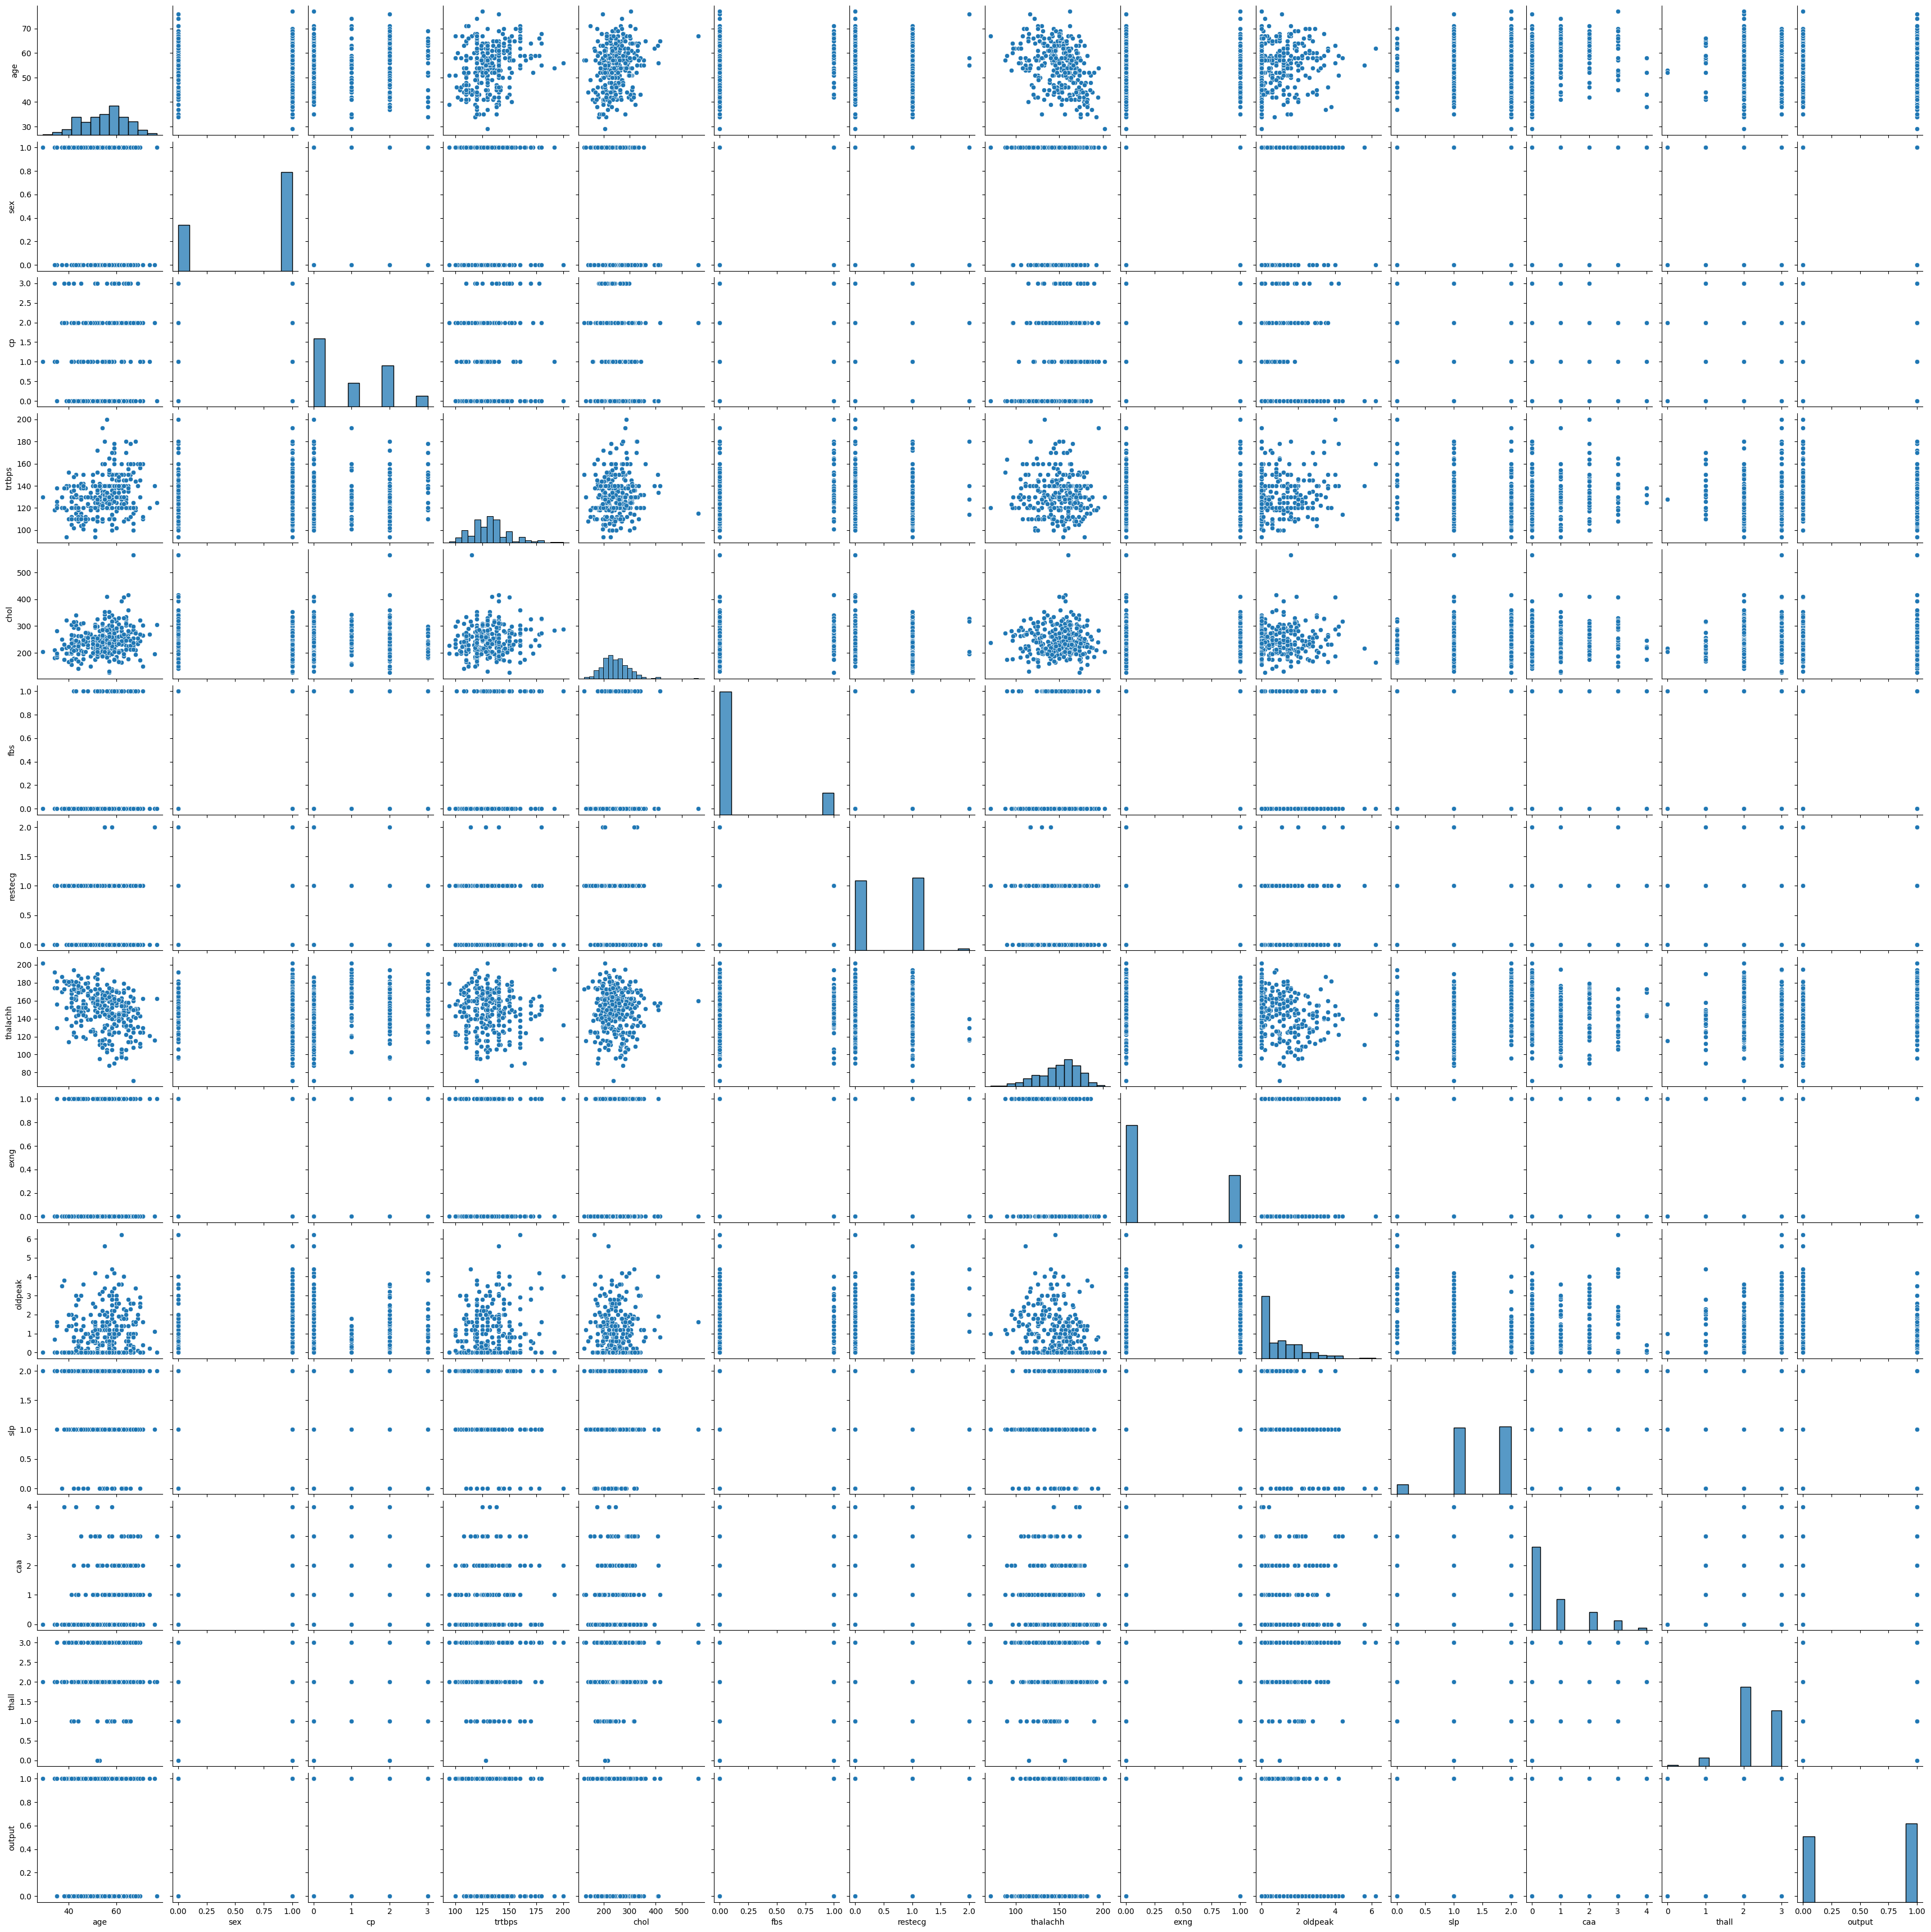

In [26]:
# Парная диаграмма
sns.pairplot(heart_df)
plt.show()

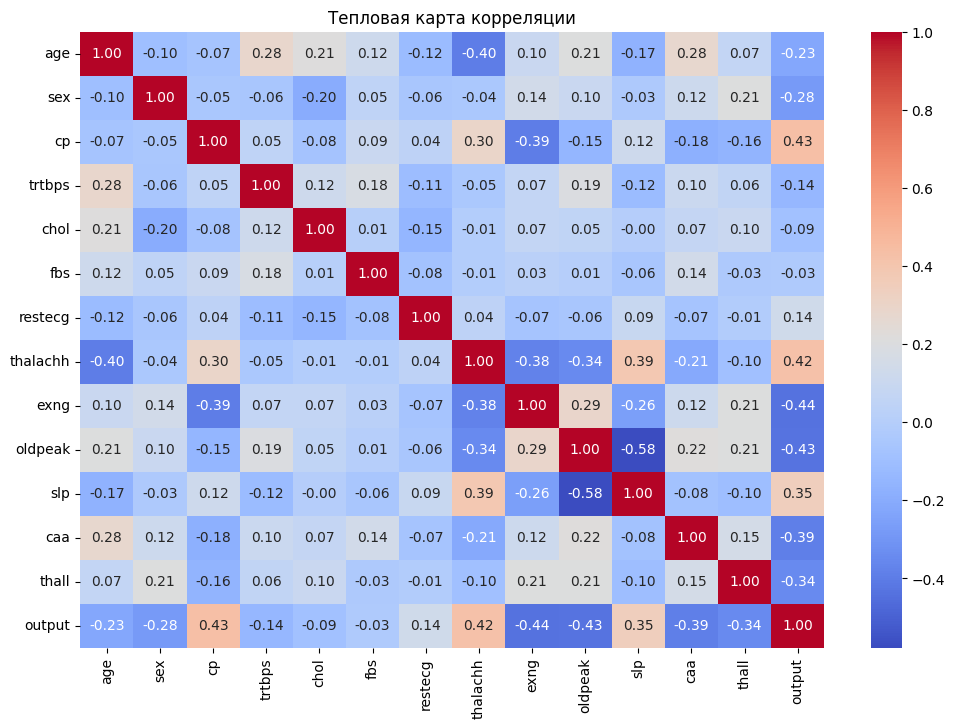

In [27]:
# Тепловая карта корреляции
plt.figure(figsize=(12, 8))
sns.heatmap(heart_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляции')
plt.show()

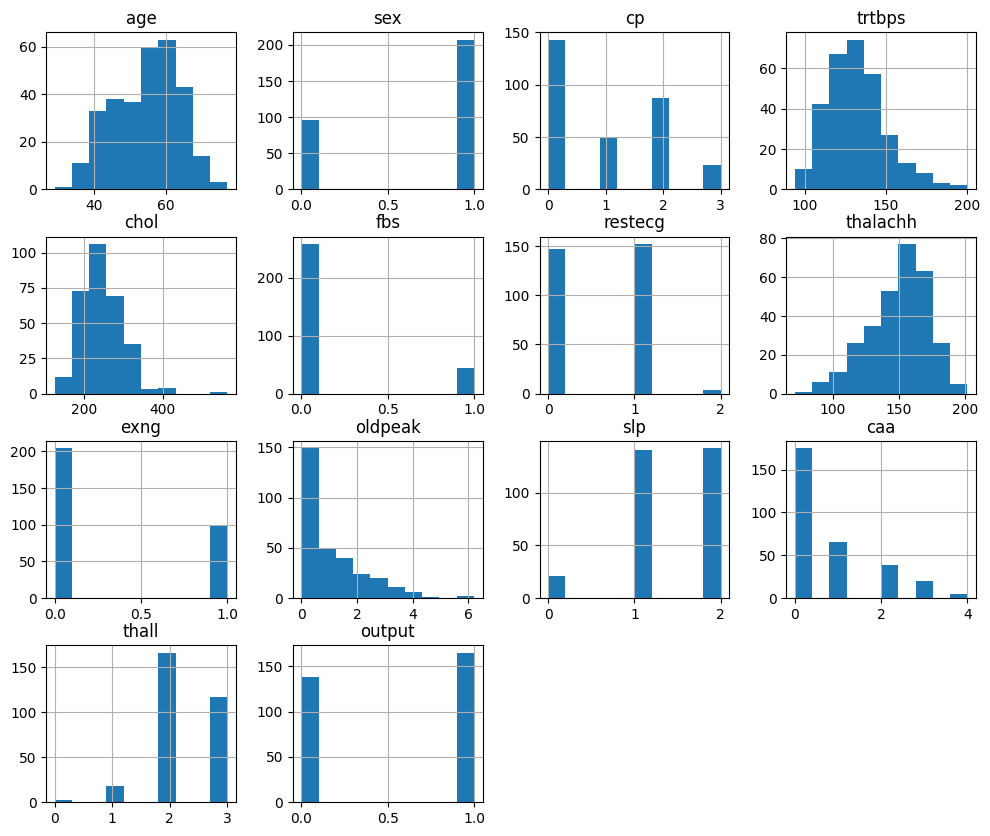

In [28]:
# Гистограммы
heart_df.hist(figsize=(12, 10))
plt.show()

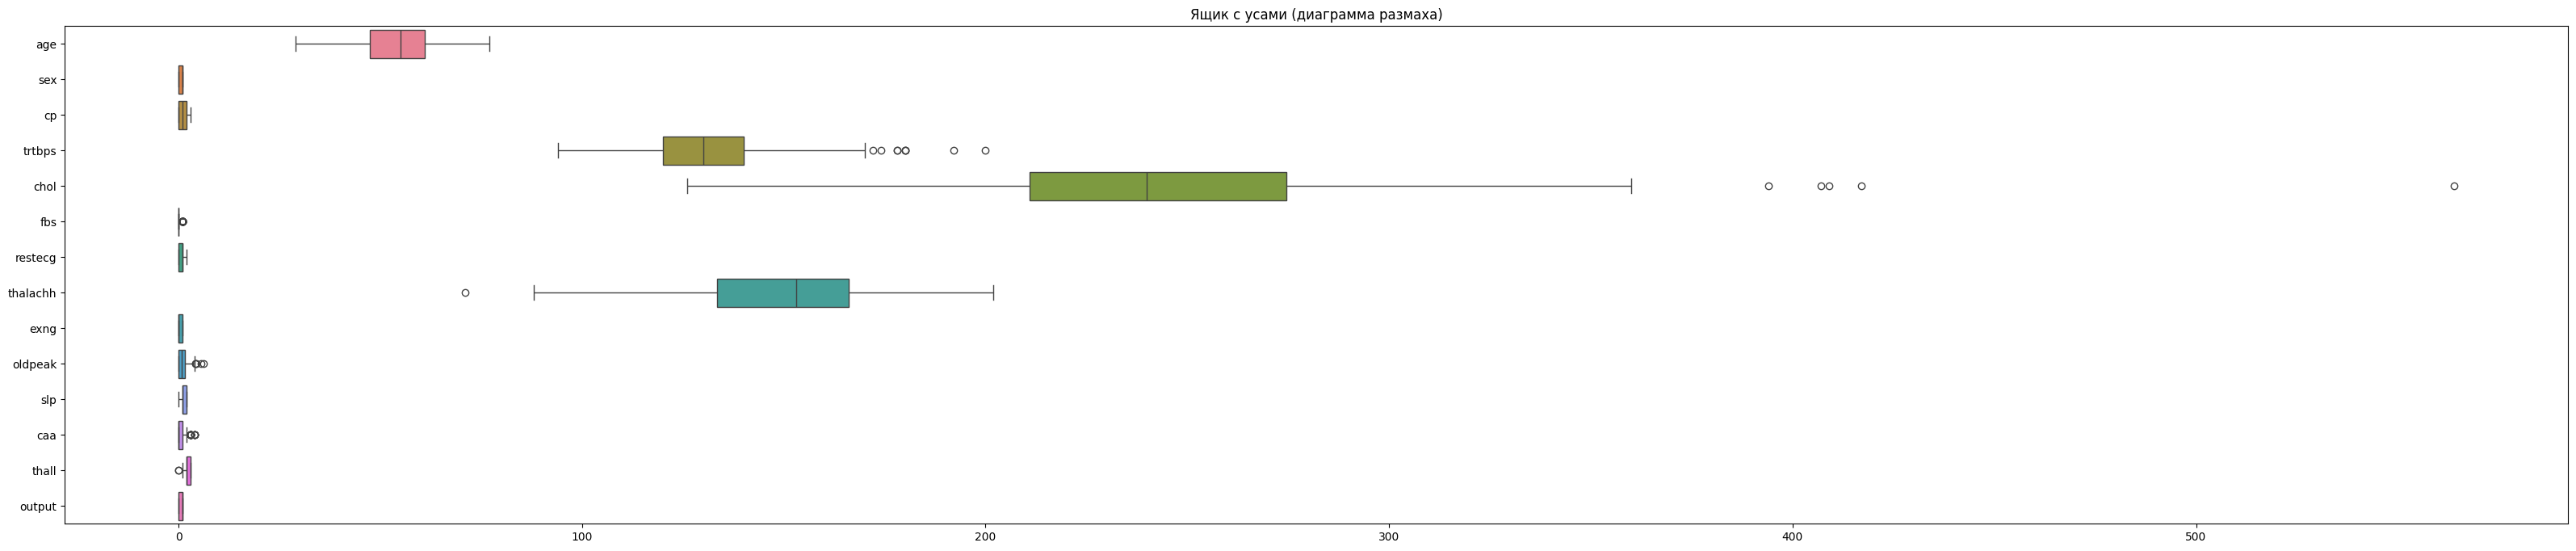

In [29]:
# Ящик с усами
plt.figure(figsize=(40, 8))
sns.boxplot(data=heart_df, orient='h')
plt.title('Ящик с усами (диаграмма размаха)')
plt.show()

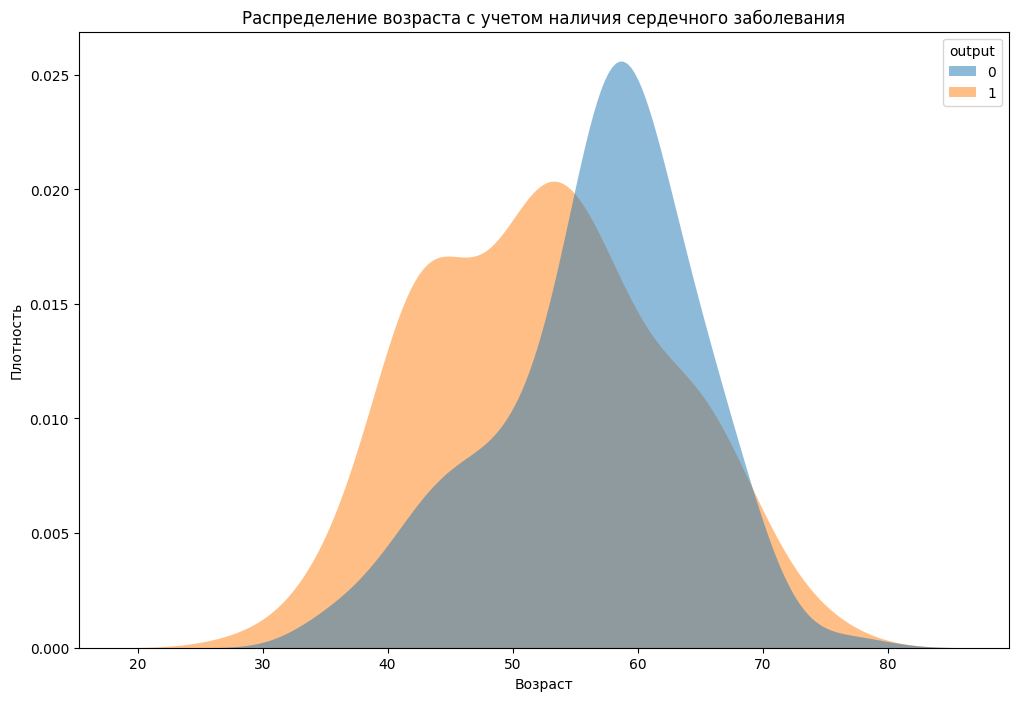

In [30]:
# Графики распределения
plt.figure(figsize=(12, 8))
sns.kdeplot(data=heart_df, x='age', hue='output', fill=True, alpha=0.5, linewidth=0)
plt.title('Распределение возраста с учетом наличия сердечного заболевания')
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.show()

In [31]:
correlation_matrix = heart_df.corr()

# Печать корреляции с целевой переменной (output)
print("Корреляция с целевой переменной (output):")
print(correlation_matrix['output'])

# Удаление признаков с корреляцией меньше 0.1
low_correlation_features = correlation_matrix[correlation_matrix['output'].abs() < 0.1].index
heart_df.drop(columns=low_correlation_features, inplace=True)

# Кодирование категориальных признаков в дискретные величины
heart_df = pd.get_dummies(heart_df)

# Производим нормализацию данных
scaler = RobustScaler()
scaled_features = scaler.fit_transform(heart_df.drop(columns=['output']))
heart_df_scaled = pd.DataFrame(scaled_features, columns=heart_df.columns[:-1])

# Разбиение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(heart_df_scaled, heart_df['output'], test_size=0.2, random_state=42)

# Проверка результатов предобработки
print("Размерность обучающей выборки:", X_train.shape)
print("Размерность тестовой выборки:", X_test.shape)

Корреляция с целевой переменной (output):
age        -0.225439
sex        -0.280937
cp          0.433798
trtbps     -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalachh    0.421741
exng       -0.436757
oldpeak    -0.430696
slp         0.345877
caa        -0.391724
thall      -0.344029
output      1.000000
Name: output, dtype: float64
Размерность обучающей выборки: (242, 11)
Размерность тестовой выборки: (61, 11)


In [32]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)


SVC()

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
# Оценка accuracy для SVM
svm_train_accuracy = accuracy_score(y_train, svm_model.predict(X_train))
svm_test_accuracy = accuracy_score(y_test, svm_model.predict(X_test))
print("Accuracy для SVM на обучающей выборке:", svm_train_accuracy)
print("Accuracy для SVM на тестовой выборке:", svm_test_accuracy)

Accuracy для SVM на обучающей выборке: 0.9173553719008265
Accuracy для SVM на тестовой выборке: 0.8524590163934426


In [37]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [38]:
# Оценка accuracy для логистической регрессии
logistic_train_accuracy = accuracy_score(y_train, logistic_model.predict(X_train))
logistic_test_accuracy = accuracy_score(y_test, logistic_model.predict(X_test))
print("Accuracy для логистической регрессии на обучающей выборке:", logistic_train_accuracy)
print("Accuracy для логистической регрессии на тестовой выборке:", logistic_test_accuracy)


Accuracy для логистической регрессии на обучающей выборке: 0.859504132231405
Accuracy для логистической регрессии на тестовой выборке: 0.8852459016393442


In [39]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
# Оценка accuracy для дерева решений
decision_tree_train_accuracy = accuracy_score(y_train, decision_tree_model.predict(X_train))
decision_tree_test_accuracy = accuracy_score(y_test, decision_tree_model.predict(X_test))
print("Accuracy для дерева решений на обучающей выборке:", decision_tree_train_accuracy)
print("Accuracy для дерева решений на тестовой выборке:", decision_tree_test_accuracy)


Accuracy для дерева решений на обучающей выборке: 1.0
Accuracy для дерева решений на тестовой выборке: 0.8360655737704918


In [41]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [42]:
# Оценка accuracy для случайного леса
random_forest_train_accuracy = accuracy_score(y_train, random_forest_model.predict(X_train))
random_forest_test_accuracy = accuracy_score(y_test, random_forest_model.predict(X_test))
print("Accuracy для случайного леса на обучающей выборке:", random_forest_train_accuracy)
print("Accuracy для случайного леса на тестовой выборке:", random_forest_test_accuracy)

Accuracy для случайного леса на обучающей выборке: 1.0
Accuracy для случайного леса на тестовой выборке: 0.8688524590163934
